This document is adapted from a lab prepared by Alex Rutherford, with permission

link to question 1 github repository: https://github.com/tubbsyal/bee2041_p1_g.git

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import random as rd

# The Doctor Strikes Back

We are now going to change the behaviour of the agents. We will add a new state where agents are immunised. When an agent recovered they will stay in the `Recovered` state but they can be infected again as if they were in the Susceptible state. We will do this by allowing `Recovered` agents to be infected by their neighbors. An agent that is immunised can never be infected. During the initialisation we will immunise a certain percent of the agents.

In [57]:
# simulation parameters

nb_agents = 100
max_iterations = 10

In [58]:
# model parameters

## infection

probInfection = 0.2
probRecovery = 0.2
probImmunity= 0.2
probInfectionInit = 0.1
probImmunityInit = 0.1
probInfectionResidual = 0.0

randomInitialInfection=True
randomInitialVaccination=False 

In [59]:
## communication structure


# model states

systemState = None
nextSystemState = None

agSusceptible = 0
agInfected = 1
agRecovered = 2
agImmunised= 3

In [60]:
# helper functions
def test_state(n,value):
    global systemState

    return systemState.nodes[n]['state'] == value

In [61]:
# model dynamics

def init():
    global systemState

    # generate communication strucure
    systemState = nx.grid_2d_graph(10,10)

    # init agents' states
    if randomInitialInfection:
        # random infection
        for a in systemState.nodes():
            if rd.random() < probInfectionInit:
                
                systemState.nodes[a]['state'] = agInfected
                print("Oh no, agent", a, "got infected!")
            else:
                systemState.nodes[a]['state'] = agSusceptible
                if rd.random() < probImmunityInit:
                    systemState.nodes[a]['state'] = agImmunised
                    print("Agent", a, "is immunised. Such a lucky guy!") 
                else:
                    print("Agent",a,"isn't infected")
    else:
        # targetted infection

        # get the measure (map node > value)
        measure = dict(nx.degree(systemState))

        # sort the nodes accordingly
        measure = sorted(measure.items(), key=lambda x: x[1],reverse=True)
        # retains only the nodes (discard the value)
        measure = [ x[0] for x in measure ]

        # infect the first N nodes with the highest values
        nb_agents_to_infect = int(probInfectionInit * float(nb_agents))
        nb_agents_to_immunise = int(probImmunityInit * float(nb_agents))



        for i in range(nb_agents_to_infect):
            systemState.nodes[measure[i]]['state']=agInfected
        for i in range(nb_agents_to_infect,nb_agents_to_infect+nb_agents_to_immunise):
            systemState.nodes[measure[i]]['state']=agImmunised
        for i in range(nb_agents_to_infect+nb_agents_to_immunise,nb_agents):
            systemState.nodes[measure[i]]['state']=agSusceptible

In [62]:
def step():
    global systemState

    # copy current network structure and agent s'states
    nextSystemState = systemState.copy()

    # determine next agents' state
    for a in systemState.nodes():
        # if infected
        if test_state(a,agInfected):
            # first try to recover
            if rd.random() < probRecovery:
                nextSystemState.nodes[a]['state'] = agRecovered
                print("Good news, agent", a, "is feeling better!")
            elif rd.random() < probImmunity:
                nextSystemState.nodes[a]['state'] = agImmunised
                print("Good news, agent", a, "is feeling better and getting Immunised!")
            # if not try to propagage virus
            else:
                for n in systemState.neighbors(a):
                    # if recovered, try to infect (again)
                    if test_state(n,agRecovered):
                        if rd.random() < probInfection:
                            nextSystemState.nodes[n]['state'] = agInfected	
                            print("Oh no, agent", n, "got infected AGAIN!")
                    # otherwise, try to infect
                    elif test_state(n,agSusceptible):
                        if rd.random() < probInfection:
                            nextSystemState.nodes[n]['state'] = agInfected	
                            print("Oh no, agent", n, "got infected!")
        # residual infection
        if test_state(a,agSusceptible) or test_state(a,agRecovered):
            if rd.random() < probInfectionResidual:
                if test_state(a,agRecovered):
                    print("Oh no, agent", a, "got infected AGAIN!")
                else:
                    print("Oh no, agent", a, "got infected!")
                nextSystemState.nodes[a]['state'] = agInfected

    # synchronous transition to next state
    systemState = nextSystemState

In [63]:
statS = []
statI = []
statR = []
statM = []

def collect_statistics():
    global systemState

    nbS = 0
    nbI = 0
    nbR = 0
    nbM = 0
    for a in systemState.nodes():
        if test_state(a,agSusceptible):
            nbS = nbS + 1
        if test_state(a,agInfected):
            nbI = nbI + 1
        if test_state(a,agRecovered):
            nbR = nbR + 1
        if test_state(a,agImmunised):
            nbM = nbM + 1
    statS.append(nbS)
    statI.append(nbI)
    statR.append(nbR)
    statM.append(nbM)
    return nbS, nbI, nbR, nbM

In [64]:
def display_statistics():
    plt.plot(statS,label="S", color="b")
    plt.plot(statI,label="I", color="r")
    plt.plot(statR,label="R", color="g")
    plt.plot(statM,label="M", color="y")

    plt.legend()
    plt.show()

In [65]:
def draw():
    global systemState

    list_colors = []
    for a in systemState.nodes():
        if test_state(a,agSusceptible):
            list_colors.append("b")
        if test_state(a,agInfected):
            list_colors.append("r")
        if test_state(a,agRecovered):
            list_colors.append("g")
        if test_state(a,agImmunised):
            list_colors.append("y")

    nx.draw(systemState, node_color = list_colors)
    plt.show()

starting simulation
Agent (0, 0) isn't infected
Agent (0, 1) isn't infected
Agent (0, 2) is immunised. Such a lucky guy!
Agent (0, 3) isn't infected
Agent (0, 4) isn't infected
Agent (0, 5) isn't infected
Oh no, agent (0, 6) got infected!
Agent (0, 7) isn't infected
Agent (0, 8) isn't infected
Agent (0, 9) isn't infected
Agent (1, 0) isn't infected
Agent (1, 1) isn't infected
Agent (1, 2) isn't infected
Agent (1, 3) isn't infected
Agent (1, 4) isn't infected
Agent (1, 5) is immunised. Such a lucky guy!
Agent (1, 6) isn't infected
Agent (1, 7) isn't infected
Agent (1, 8) isn't infected
Oh no, agent (1, 9) got infected!
Agent (2, 0) isn't infected
Agent (2, 1) isn't infected
Agent (2, 2) isn't infected
Oh no, agent (2, 3) got infected!
Agent (2, 4) isn't infected
Agent (2, 5) isn't infected
Oh no, agent (2, 6) got infected!
Agent (2, 7) isn't infected
Agent (2, 8) isn't infected
Agent (2, 9) isn't infected
Agent (3, 0) isn't infected
Agent (3, 1) isn't infected
Agent (3, 2) isn't infecte

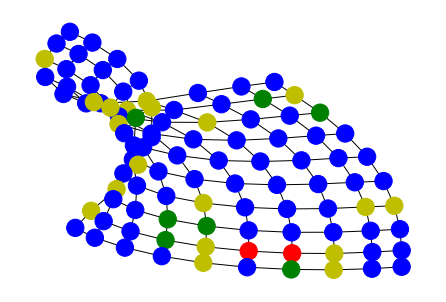

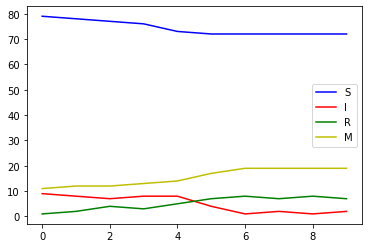

In [66]:
def run_simulation():
    print("starting simulation")
    init()
    #draw()
    i = 0
    while i < max_iterations:
        print("== round", i)
        step()
        #draw()
        nbS, nbI, nbR, nbM = collect_statistics()
        if nbI == 0:
            break
        i = i + 1
    print("the end")
    draw()	
    display_statistics()

if __name__ == "__main__":
    run_simulation()